# Notebook to Make Lorenz Curves

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D

### Data In

In [2]:
# File paths

data_raw = '/Users/cascade/Github/NTL/data/raw/'
data_temp = '/Users/cascade/Github/NTL/temp_data/'
data_interim = '/Users/cascade/Github/NTL/data/interim/'
ms_data = '/Users/cascade/Github/NTL/temp_data/MS_Data/'
erl_data = '/Users/cascade/Github/NTL/temp_data/ERL_data/'
downloads = '/Users/cascade/Downloads/'

In [3]:
# Data

# GHS2000 = gpd.read_file(erl_data+'GHS_POP_GPW42000_final20190122.shp')
# GHS2015 = gpd.read_file(erl_data+'GHS_POP_GPW42015_final20190122.shp')
# WP2000 = gpd.read_file(erl_data+'AFR_PPP_2000_adj_v2_final20190122.shp')
# WP2015 = gpd.read_file(erl_data+'AFR_PPP_2015_adj_v2_final20190122.shp')
# LS2015 = gpd.read_file(erl_data+'WPE_1KM_2016_final20190122.shp')
# WPE2016 = gpd.read_file(erl_data+'LS15_final20190122.shp')

# Data with Rain Zones & Regions & FIDs Dropped (2019-02-13)

GHS2000 = gpd.read_file(erl_data+'GHS_POP_GPW42000_20190213.shp')
GHS2015 = gpd.read_file(erl_data+'GHS_POP_GPW42015_20190213.shp')
WP2000 = gpd.read_file(erl_data+'AFR_PPP_2000_adj_v2_20190213.shp')
WP2015 = gpd.read_file(erl_data+'AFR_PPP_2015_adj_v2_20190213.shp')
LS2015 = gpd.read_file(erl_data+'WPE_1KM_2016_20190213.shp')
WPE2016 = gpd.read_file(erl_data+'LS15_20190213.shp')

In [4]:
# List of datasets

datasets_in = [GHS2000, GHS2015, WP2000, WP2015, LS2015, WPE2016]

In [5]:
GHS2000.head()

,osm_id,FID,country,city,osm_type,lat,lon,PopTot,aez_class,region,rain_zone,geometry
0,89369215,5382,Algeria,Tamanrasset,town,22.785454,5.532446,3.091468e+04,Tropic - cool / arid,Northern_Africa,Arid,"POLYGON ((5.512930562910484 22.80475188764244,..."
1,252600742,624,Algeria,Boumerdès,town,36.758882,3.470596,4.041199e+06,Subtropic - warm / subhumid,Northern_Africa,Sub-humid,"POLYGON ((2.960095682991406 36.82071885667166,..."
2,253167052,195,Algeria,Thenia,town,36.724986,3.556935,2.767512e+04,Subtropic - warm / subhumid,Northern_Africa,Sub-humid,"POLYGON ((3.610972972741118 36.75033076389462,..."
3,253167208,150,Algeria,Zemmouri,town,36.786406,3.601221,2.016720e+04,Subtropic - warm / subhumid,Northern_Africa,Sub-humid,"POLYGON ((3.555512812300016 36.81191901602259,..."
4,253291208,436,Algeria,Lakhdaria,town,36.563944,3.596907,4.186613e+04,Subtropic - warm / subhumid,Northern_Africa,Sub-humid,"POLYGON ((3.548917172615572 36.58325611006445,..."


### Add Rain Zones & Regions

In [ ]:
### List of African Countries from the UN in OSM wiki

Northern_Africa = (['Algeria', 'Egypt', 'Libya', 'Morocco', 'Tunisia', 'Western Sahara'], 'Northern_Africa')

Eastern_Africa = ([
    'Burundi',
    'Comoros',
    'Djibouti',
    'Eritrea',
    'Ethiopia',
    'Kenya',
    'Madagascar',
    'Malawi',
    'Mauritius',
    #Mayotte,
    'Mozambique',
    'Réunion',
    'Rwanda',
    'Somalia',
    'Sudan',
    'Uganda',
    'Tanzania',
    'Zambia',
    'Zimbabwe'], 'Eastern_Africa')
    
Middle_Africa = ([
    'Angola',
    'Cameroon',
    'Central African Republic',
    'Chad',
    'Congo-Brazzaville',
    'Congo-Kinshasa',
    'Equatorial Guinea',
    'Gabon',
    'Sao Tome and Principe'], 'Middle_Africa')
    
Southern_Africa = ([
    'Botswana',
    'Lesotho',
    'Namibia',
    'South Africa',
    'Swaziland'], 'Southern_Africa')
    
Western_Africa = ([
    'Benin',
    'Burkina Faso',
    'Cape Verde',
    'Côte d\'Ivoire',
    'Gambia',
    'Ghana',
    'Guinea',
    'Guinea-Bissau',
    'Liberia',
    'Mali',
    'Mauritania',
    'Niger',
    'Nigeria',
    'Senegal',
    'Sierra Leone',
    'Togo'], 'Western_Africa')

In [ ]:
regions = [Northern_Africa, Western_Africa, Eastern_Africa, Southern_Africa, Middle_Africa]

In [ ]:
def region_col(gpd_df, regions_tuple, col_name_in, new_col):
    """
    Function searchs a col of a data frame and matches it with a list of 
    tuples of which [0] countains a list of values to be cross referenced
    & then makes a new col with the tuple [1] ... For example, you have a col with countries
    and you want to make a new col listing the region that country is apart of
    """
    arr = []
    for i, row in gpd_df.iterrows():
        for region in regions_tuple:
            for country in region[0]:
                if row[col_name_in] == country:
                    name = region[1]
                    arr.append(name)
                    break
    gpd_df[new_col] = arr
    return gpd_df

In [ ]:
for dataset in datasets_in:
    dataset = region(dataset, regions, 'country', 'region')

In [ ]:
GHS2000.iloc[2500:2510]

In [ ]:
# Group my rainfall zone

arid = (['Temperate / arid', 
         'Subtropic - warm / arid', 
         'Subtropic - cool / arid', 
         'Tropic - warm / arid',
         'Tropic - cool / arid'], 'Arid')

semi_arid = (['Temperate / Semi-arid', 
              'Subtropic - warm / semiarid', 
              'Subtropic - cool / semiarid',
              'Tropic - warm / semiarid', 
              'Tropic - cool / semiarid'], 'Semi-arid')    

sub_humid = (['Temperate / sub-humid', 
              'Subtropic - warm / subhumid', 
              'Subtropic - cool / subhumid',
              'Tropic - warm / subhumid', 
              'Tropic - cool / subhumid'], 'Sub-humid')

humid = (['Temperate / humid', 
          'Subtropic - warm / humid', 
          'Subtropic - cool / humid', 
          'Tropic - warm / humid',
          'Tropic - cool / humid'], 'Humid')

boreal = (['Boreal'], 'Boreal')

na = (['NoClass', '0'], 'NA')

rain_list = [arid, semi_arid, sub_humid, humid, boreal, na]

In [ ]:
for dataset in datasets_in:
    dataset = region(dataset, rain_list, 'aez_class', 'rain_zone')

In [ ]:
# Drop Duplicate FIDs (Polygons) and <5000 people 

print('1---WP2015---') # World Pop 2015

# drop FID
print(len(WP2015))
WP2015 = WP2015.drop_duplicates('FID', keep = 'first')
print(len(WP2015))

# drop <5000
WP2015 = WP2015[WP2015['PopTot'] > 5000]
print(len(WP2015))

print('2---LS2015---') # LandScan 2015
# drop FID
print(len(LS2015))
LS2015 = LS2015.drop_duplicates('FID', keep = 'first')
print(len(LS2015))

# drop <5000
LS2015 = LS2015[LS2015['PopTot'] > 5000]
print(len(LS2015))

print('3---WPE2016---') # WPE 2016
# drop FID
print(len(WPE2016))
WPE2016 = WPE2016.drop_duplicates('FID', keep = 'first')
print(len(WPE2016))

# drop <5000
WPE2016 = WPE2016[WPE2016['PopTot'] > 5000]
print(len(WPE2016))

print('4---GHS2015---') # GHS 2015
# drop FID
print(len(GHS2015))
GHS2015 = GHS2015.drop_duplicates('FID', keep = 'first')
print(len(GHS2015))

# drop <5000
GHS2015 = GHS2015[GHS2015['PopTot'] > 5000]
print(len(GHS2015))

print('5---GHS2000---') # GHS 2000
# drop FID
print(len(GHS2000))
GHS2000 = GHS2000.drop_duplicates('FID', keep = 'first')
print(len(GHS2000))

# drop <5000
GHS2000 = GHS2000[GHS2000['PopTot'] > 5000]
print(len(GHS2000))

      
print('6---WP2000---') # World Pop 2000

# drop FID
print(len(WP2000))
WP2000 = WP2000.drop_duplicates('FID', keep = 'first')
print(len(WP2000))

# drop <5000
WP2000 = WP2000[WP2000['PopTot'] > 5000]
print(len(WP2000))

# SAVE OUT

On 2019-02-13 CPT saved out all files, with FID duplicates dropped (thus losing unique OSM labels for some polygons), and regions and rain_zones added

In [ ]:
# GHS2000.to_file(erl_data+'GHS_POP_GPW42000_20190213.shp', driver = 'ESRI Shapefile')
# GHS2015.to_file(erl_data+'GHS_POP_GPW42015_20190213.shp', driver = 'ESRI Shapefile')
# WP2000.to_file(erl_data+'AFR_PPP_2000_adj_v2_20190213.shp', driver = 'ESRI Shapefile')
# WP2015.to_file(erl_data+'AFR_PPP_2015_adj_v2_20190213.shp', driver = 'ESRI Shapefile')
# LS2015.to_file(erl_data+'WPE_1KM_2016_20190213.shp', driver = 'ESRI Shapefile')
# WPE2016.to_file(erl_data+'LS15_20190213.shp', driver = 'ESRI Shapefile')

### Lorzen Curves

https://zhiyzuo.github.io/Plot-Lorenz/

#### Functions

In [29]:
def gini(series):
    
    ## series to array
    arr = series.values
    
    ## first sort
    sorted_arr = arr.copy(np.array)
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

In [7]:
def lorenz_curve(X):
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    X_lorenz[0], X_lorenz[-1]
    fig, ax = plt.subplots(figsize=[6,6])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               marker='x', color='darkgreen', s=100)
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')

# Calc Gini by country

In [155]:
test = GHS2015[GHS2015['PopTot'] < 5*10**6]
out = test.groupby('country').PopTot.agg(gini)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  import sys


In [156]:
gini2015_df = pd.DataFrame()
gini2015_df['country'] = out.keys()
gini2015_df['gini'] = out.values

In [157]:
out.keys()

Index(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros',
       'Congo-Brazzaville', 'Côte d'Ivoire', 'Djibouti', 'Egypt',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Réunion',
       'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'Sudan',
       'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country')

In [158]:
gini2015_df.head()

,country,gini
0,Algeria,0.601216
1,Angola,0.627434
2,Benin,0.732784
3,Botswana,0.361542
4,Burkina Faso,0.706617


In [130]:
fao_ag = pd.read_csv(data_temp+'Macro-Statistics_Key_Indicators_E_Africa.csv')

In [171]:
# Value added as share gpd 2010 prices

value = fao_ag.loc[(fao_ag['Item Code'] == 22016) & (fao_ag['Element Code'] == 6169)]

In [172]:
ag2000_df = value.filter(['Area', 'Y2000'])
ag2000_df.columns = ag_df.columns.str.replace('Area', 'country')

In [173]:
ag2000_df.head()

,country,Y2015
35,Algeria,6.355908
124,Angola,4.419876
191,Benin,23.012351
273,Botswana,2.531669
375,Burkina Faso,37.559663


In [168]:
ag_result = pd.merge(ag2000_df, ag2015_df, on='country', how='inner')
ag_result

,country,Y2015_x,Y2015_y
0,Algeria,6.355908,10.113739
1,Angola,4.419876,9.807117
2,Benin,23.012351,21.300585
3,Botswana,2.531669,1.828889
4,Burkina Faso,37.559663,26.032329
5,Burundi,57.652872,32.691460
6,Cabo Verde,13.635643,8.582208
7,Cameroon,15.360262,13.948229
8,Central African Republic,39.141192,31.487249
9,Chad,33.169196,31.928234


In [142]:
result = pd.merge(gini_df, ag_df, on='country', how='inner')

In [143]:
result.head()

,country,gini,Y2015
0,Algeria,0.601216,10.113739
1,Angola,0.627434,9.807117
2,Benin,0.732784,21.300585
3,Botswana,0.361542,1.828889
4,Burkina Faso,0.706617,26.032329


Text(0,0.5,'Value added by Agriculture as Share of GDP')

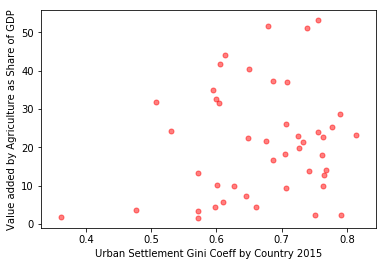

In [144]:
plt.scatter(result.gini, result.Y2015, marker='.', color='Red', s=100, alpha = 0.5)
plt.xlabel('Urban Settlement Gini Coeff by Country 2015')
plt.ylabel('Value added by Agriculture as Share of GDP')

#### Select data

In [ ]:
## Rain Zone
# X = np.sort(np.array(GHS2000[GHS2000['rain_zone'] == 'Semi-arid'].PopTot))
# Y = np.sort(np.array(GHS2015[GHS2015['rain_zone'] == 'Semi-arid'].PopTot))

# print(len(X))
# print(len(Y))
## Country
# X = np.sort(np.array(GHS2000[GHS2000['country'] == 'South Africa'].PopTot))
# Y = np.sort(np.array(GHS2015[GHS2015['country'] == 'South Africa'].PopTot))

## All Africa 
# X = np.sort(np.array(GHS2000.PopTot))
# Y = np.sort(np.array(GHS2015.PopTot))

## Conditional
# X = np.sort(np.array(GHS2000[GHS2000['PopTot'] < 5*10**6].PopTot))
# Y = np.sort(np.array(GHS2015[GHS2015['PopTot'] < 5*10**6].PopTot))

# X = GHS2000.loc[(GHS2000['rain_zone'] == 'Arid') & (GHS2000['country'] != 'Egpyt')]
# X = np.sort(np.array(X.PopTot))

# Y = GHS2015.loc[(GHS2015['rain_zone'] == 'Arid') & (GHS2015['country'] != 'Egpyt')]
# Y = np.sort(np.array(Y.PopTot))


# X = X[(X < 5*10**6)]
# Y = Y[(Y < 5*10**6)]

print(len(X))
print(len(Y))

In [ ]:
# Curves 

# A = np.sort(np.array(GHS2000[GHS2000['country'] == 'Ghana'].PopTot))
# B = np.sort(np.array(GHS2000[GHS2000['country'] == 'Nigeria'].PopTot))
# C = np.sort(np.array(GHS2000[GHS2000['country'] == 'Zambia'].PopTot))

# A_lorenz = A.cumsum() / A.sum()
# A_lorenz = np.insert(A_lorenz, 0, 0)
# A_lorenz[0], A_lorenz[-1]

# B_lorenz = B.cumsum() / B.sum()
# B_lorenz = np.insert(B_lorenz, 0, 0)
# B_lorenz[0], B_lorenC[-1]

# C_lorenz = C.cumsum() / C.sum()
# C_lorenz = np.insert(C_lorenz, 0, 0)
# C_lorenz[0], C_lorenz[-1]

In [ ]:
# Curves 

title = 'Africa'

V = np.sort(np.array(GHS2000.PopTot))
W = np.sort(np.array(GHS2015.PopTot))

#V = np.sort(np.array(GHS2000[GHS2000['country'] == title].PopTot))
#W = np.sort(np.array(GHS2015[GHS2015['country'] == title].PopTot))

# W = np.sort(np.array(GHS2015[GHS2015['country'] == 'South Africa'].PopTot))
# X = np.sort(np.array(GHS2015[GHS2015['country'] == 'Ghana'].PopTot))
# Y = np.sort(np.array(GHS2015[GHS2015['country'] == 'Nigeria'].PopTot))
# Z = np.sort(np.array(GHS2015[GHS2015['country'] == 'Zambia'].PopTot))

# V_lorenz = V.cumsum() / V.sum()
# V_lorenz = np.insert(V_lorenz, 0, 0)
# V_lorenz[0], V_lorenz[-1]

# W_lorenz = W.cumsum() / W.sum()
# W_lorenz = np.insert(W_lorenz, 0, 0)
# W_lorenz[0], W_lorenz[-1]

# X_lorenz = X.cumsum() / X.sum()
# X_lorenz = np.insert(X_lorenz, 0, 0)
# X_lorenz[0], X_lorenz[-1]

# Y_lorenz = Y.cumsum() / Y.sum()
# Y_lorenz = np.insert(Y_lorenz, 0, 0)
# Y_lorenz[0], Y_lorenz[-1]

# Z_lorenz = Z.cumsum() / Z.sum()
# Z_lorenz = np.insert(Z_lorenz, 0, 0)
# Z_lorenz[0], Z_lorenz[-1]

In [ ]:
## Rain Zone
title = 'Ethiopia'
col = 'country'
X = np.sort(np.array(GHS2000[GHS2000[col] == title].PopTot))
Y = np.sort(np.array(GHS2015[GHS2015[col] == title].PopTot))

## All Africa
# title = 'Africa'
# X = np.sort(np.array(GHS2000.PopTot))
# Y = np.sort(np.array(GHS2015.PopTot))

X = X[(X < 5*10**6)]
Y = Y[(Y < 5*10**6)]

X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]

Y_lorenz = Y.cumsum() / Y.sum()
Y_lorenz = np.insert(Y_lorenz, 0, 0)
Y_lorenz[0], Y_lorenz[-1]

In [ ]:
print(len(Z))
print(len(Pop))
len(Z_lorenz)

In [ ]:
# find thresholds of urban population held by settlment rank
title = 'Sub-humid'
col = 'rain_zone'
dataset = GHS2015
#Z = np.sort(np.array(dataset[dataset[col] == title].PopTot))
Z = np.sort(np.array(dataset.PopTot))

Z = Z[(Z < 5*10**6)]

Z_lorenz = Z.cumsum() / Z.sum()
Z_lorenz = np.insert(Z_lorenz, 0, 0)
Z_lorenz[0], Z_lorenz[-1]

Pop = np.insert(Z, 0, 0)

df = pd.DataFrame()
df['x-axis'] = np.arange(Z_lorenz.size)/(Z_lorenz.size-1)
df['y-axis'] = Z_lorenz
df['PopTot'] = Pop

In [ ]:
df[3720:3800]

In [ ]:
%matplotlib inline

## Size & number
sns.set(font_scale=3)
fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))


## scatter plot of Lorenz curve
# ax1.scatter(np.arange(V_lorenz.size)/(V_lorenz.size-1), V_lorenz, 
#            marker='.', color='orange', s=100, alpha = 0.5)

# ax1.scatter(np.arange(W_lorenz.size)/(W_lorenz.size-1), W_lorenz, 
#            marker='.', color='purple', s=100, alpha = 0.5)

ax1.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
           marker='.', color='Red', s=100, alpha = 0.5)

ax1.scatter(np.arange(Y_lorenz.size)/(Y_lorenz.size-1), Y_lorenz, 
           marker='.', color='Blue', s=100, alpha = 0.5)

# ax1.scatter(np.arange(Z_lorenz.size)/(Z_lorenz.size-1), Z_lorenz, 
#            marker='.', color='Orange', s=100, alpha = 0.5)

# ax1.scatter(np.arange(A_lorenz.size)/(A_lorenz.size-1), A_lorenz, 
#            marker='*', color='Blue', s=100, alpha = 0.5)

# ax1.scatter(np.arange(B_lorenz.size)/(B_lorenz.size-1), B_lorenz, 
#            marker='*', color='Purple', s=100, alpha = 0.5)

# ax1.scatter(np.arange(C_lorenz.size)/(C_lorenz.size-1), C_lorenz, 
#            marker='*', color='Orange', s=100, alpha = 0.5)


## Title
plt.title(title)
leg = ['GHS 2000', 'GHS 2015']
#plt.legend(leg,loc=2, markerscale=3)

## line plot of equality
ax1.plot([0,1], [0,1], color='k')

#remove ticks
# ax.set_xticks([])
# ax.set_yticks([])

# Set Color
ax1.set_facecolor('White')

#fig.savefig('/Users/cascade/Desktop/'+title+'_Lorenz.png', dpi=700)

In [ ]:
# test = np.log(GHS2000[GHS2000['country'] == 'Nigeria'].PopTot)
test = np.log10(GHS2015.PopTot)
colors = GHS2015.rain_zone
len(test)
fig, ax = plt.subplots(figsize=[15,15])
ax = sns.swarmplot(x=test, size =4, alpha = .5, palette = colors)

# boxen plots and violent plots are cool too